In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as pp
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import math
from scipy.stats.stats import pearsonr


data = pd.read_csv('D:/textAnalysis/marketing-data.csv',sep=',',header='infer')

def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    return data

data = binaryType_(data)

# print(np.corrcoef(data['campaign'],data['is_success']))
# print(np.corrcoef(data['pdays'],data['is_success']))
# print(np.corrcoef(data['duration'],data['is_success']))
# print(np.corrcoef(data['age'],data['is_success']))
# print(np.corrcoef(data['default'],data['is_success']))
# print(np.corrcoef(data['housing'],data['is_success']))
# print(np.corrcoef(data['loan'],data['is_success']))

#print(data.education.unique())
#print(data.education.value_counts())
# sec = (data.education.value_counts()[0]/ len(data.education) * 100).tolist()
# pri = (data.education.value_counts()[1]/ len(data.education) * 100).tolist()
# teri = (data.education.value_counts()[2]/ len(data.education) * 100).tolist()
# tot = sec + pri + teri
# sec_unk = math.ceil((sec/tot) * 100)
# pri_unk = math.ceil((pri/tot) * 100)
# teri_unk = math.ceil((teri/tot) * 100) -1
# unk_sec = math.ceil((data.education.value_counts()[3] * sec_unk) / 100 )
# unk_pri = math.ceil((data.education.value_counts()[3] * pri_unk) / 100 )
# unk_teri = math.ceil((data.education.value_counts()[3] * teri_unk) / 100 ) -1 

# for i in range(data.education.value_counts()[3]):
#     for j in range(len(data['education'])):
#         if i != unk_sec:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'secondary'
#         elif i != unk_sec+unk_pri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'primary'
#         elif i != unk_sec+unk_pri+unk_teri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'tertiary'
#         else:
#             break
            

#data.loc(data['education'][i].replace(('unknown'), ('secondary'), inplace=True) for i in range(unk_sec) if data['education'] == 'unknown') 
#print(data.columns)
#print(data.marital.unique())
#print(data[['marital', 'is_success']].groupby(['marital'], as_index=False).mean())
for i in range(len(data.marital.unique())):
    data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

for j in range(len(data.job.unique())):
    data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

for k in range(len(data.contact.unique())):
    data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

for l in range(len(data.education.unique())):
    data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)
    
#for m in range(len(data.poutcome.unique())):
#    data['poutcome_'+str(data.poutcome.unique()[m])] = (data.poutcome == data.poutcome.unique()[m]).astype(int)

data = data.drop(['education'],axis=1)
data = data.drop(['marital'],axis=1)
data = data.drop(['job'],axis=1)
data = data.drop(['contact'],axis=1)
data = data.drop(['poutcome'],axis=1)

#print(data.columns)
#print(data.age.value_counts())
print()

[[ 1.         -0.07317201]
 [-0.07317201  1.        ]]
[[ 1.          0.10362149]
 [ 0.10362149  1.        ]]
[[ 1.          0.39452102]
 [ 0.39452102  1.        ]]
[[ 1.          0.02515502]
 [ 0.02515502  1.        ]]
[[ 1.         -0.02241897]
 [-0.02241897  1.        ]]
[[ 1.        -0.1391727]
 [-0.1391727  1.       ]]
[[ 1.         -0.06818503]
 [-0.06818503  1.        ]]



In [6]:
#data = data.drop(['poutcome'],axis=1)
from sklearn.neighbors import KNeighborsClassifier

#eclf1 = VotingClassifier(estimators=[('knn', knn)], voting='soft', weights=[2])

def age_(data):
    
    for x in range(len(data['age'])):
        if data['age'][i] <= 28:
            if data['age'][i] >= 18:
                data['age'][i] = 1
        elif data['age'][i] <= 39:
            if data['age'][i] >= 29:
                data['age'][i] = 2
        elif data['age'][i] <=49:
            if data['age'][i] >=40:
                data['age'][i] = 3
        else:
            data['age'][i]=4
    
    return data

def pdays_(data):

    for i in range(len(data['pdays'])):
        if data['pdays'][i] < 100:
            if data['pdays'][i] > 0:
                data['pdays'][i] = 1
        elif data['pdays'][i] < 300:
            if data['pdays'][i] > 99:
                data['pdays'][i] = 2
        elif data['pdays'][i] > 299:
            data['pdays'][i] = 3
        else:
            data['pdays'][i] = 4
            
    return data

    
data = pdays_(data)
data = age_(data)


#print(data[['education', 'is_success']].groupby(['education'], as_index=False).mean())
#print(data.education.unique())
#print(data.columns)
#print(data[['housing', 'is_success']].groupby(['housing'], as_index=False).mean())
#print(data[['loan', 'is_success']].groupby(['loan'], as_index=False).mean())
#print(data[['job', 'is_success']].groupby(['job'], as_index=False).mean())
# print(data[['pdays', 'is_success']].groupby(['pdays'], as_index=False).mean())
# print(data[['previous', 'is_success']].groupby(['previous'], as_index=False).mean())
# print(data[['poutcome', 'is_success']].groupby(['poutcome'], as_index=False).mean())
# print(data[['campaign', 'is_success']].groupby(['campaign'], as_index=False).mean())
# from sklearn import preprocessing
# LEncoder = preprocessing.LabelEncoder()
# LEncoder.fit(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'])
# data['job'] = LEncoder.transform(data['job'])
#print(data['job'])





# clf = svm.SVC(kernel='rbf', C=1,gamma=1)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

# print(accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [7]:
def campaign_(data):
    
    for i in range(len(data['campaign'])):
        #print(data['campaign'][i])
        if data['campaign'][i] == 1:
            data['campaign'][i] = 1
        elif data['campaign'][i] >=2:
            if data['campaign'][i] <=3:
                data['campaign'][i] = 2
        else:
            data['campaign'][i] = 3
    return data

data = campaign_(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
def balance_(data):
    
    for x in range(len(data['balance'])):
        if data['balance'][x] < 1001:
            if data['balance'][x] > 0:
                data['balance'][x] = 1
        elif data['balance'][x] < 3001:
            if data['balance'][x] > 1000:
                data['balance'][x] = 2
        elif data['balance'][x] < 10001:
            if data['balance'][x] > 3000:
                data['balance'][x] = 3
        elif data['balance'][x] > 10000:
            data['balance'][x] = 4
        elif data['balance'][x] == 0:
            data['balance'][x] = 5
        
    
    return data
    
data = balance_(data)
data_X = data.drop(['is_success','day','month'],axis=1)
data_y = pd.DataFrame(data['is_success'])
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2,random_state=0)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))

rforest = RandomForestClassifier()
rforest = rforest.fit(X_train,y_train)
yprediction = rforest.predict(X_test)

print(accuracy_score(yprediction,y_test))

gbc = GradientBoostingClassifier()
gbc =gbc.fit(X_train,y_train)
y_out = gbc.predict(X_test)
print(accuracy_score(y_out,y_test))

abc = AdaBoostClassifier()
abc =abc.fit(X_train,y_train)
y_output = abc.predict(X_test)
print(accuracy_score(y_output,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0.793873714475
0.855025986951
0.877253123963


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.880238858786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.89162888422
0.88886431494


In [9]:
print(data['balance'].value_counts())

 1       23300
 2        9020
 3        4782
 0        3514
 4         829
-1          50
-2          25
-3          22
-97         17
-17         16
-90         16
-100        16
-63         16
-15         16
-27         16
-158        16
-4          15
-24         15
-32         15
-11         15
-56         14
-119        14
-14         14
-6          14
-35         14
-98         13
-267        13
-7          13
-45         13
-79         13
         ...  
-1300        1
-905         1
-777         1
-713         1
-681         1
-467         1
-1193        1
-1545        1
-918         1
-1737        1
-982         1
-1014        1
-1110        1
-1270        1
-1480        1
-1224        1
-808         1
-680         1
-501         1
-533         1
-597         1
-661         1
-725         1
-757         1
-853         1
-1013        1
-1493        1
-1781        1
-1941        1
-1601        1
Name: balance, dtype: int64


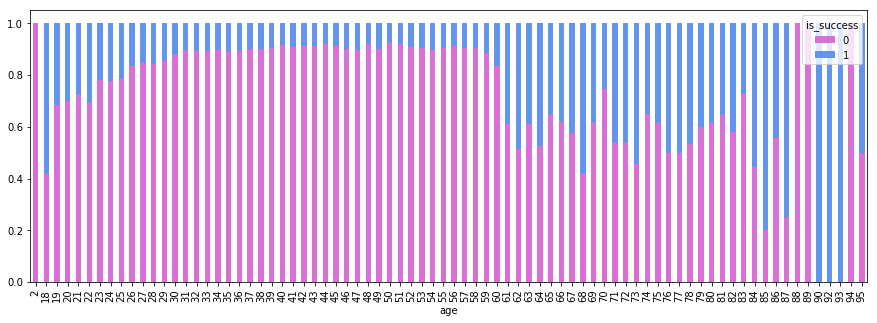

In [10]:
draw_data = pd.crosstab(data.age, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

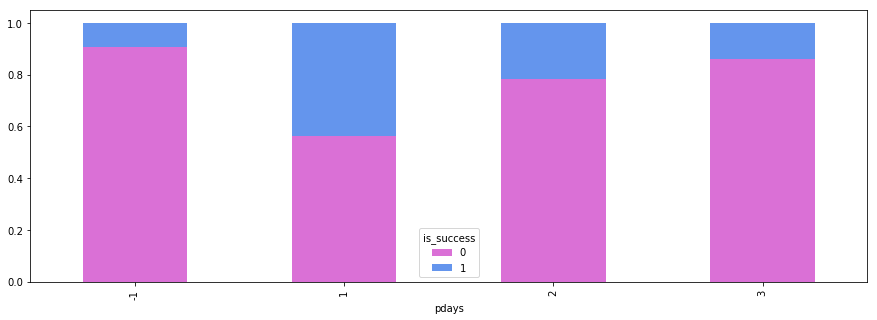

In [11]:
draw_data = pd.crosstab(data.pdays, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

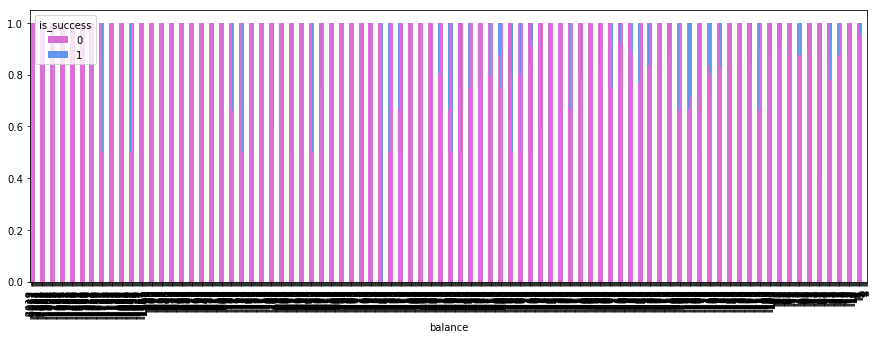

In [12]:
draw_data = pd.crosstab(data.balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

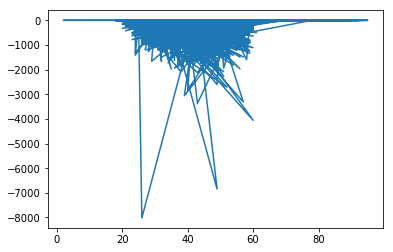

In [13]:
#data = pd.read_csv('D:/textAnalysis/marketing-data.csv',sep=',',header='infer')
figure = pp.figure()
new_plot = figure.add_subplot(111)
new_plot.plot(data['age'], data['balance'])
pp.show()

In [14]:
print (data[['age', 'is_success']].groupby(['age'], as_index=False).mean())

    age  is_success
0     2    0.000000
1    18    0.583333
2    19    0.314286
3    20    0.300000
4    21    0.278481
5    22    0.310078
6    23    0.217822
7    24    0.225166
8    25    0.214421
9    26    0.166460
10   27    0.155116
11   28    0.156069
12   29    0.144304
13   30    0.123506
14   31    0.103206
15   32    0.105995
16   33    0.106545
17   34    0.102591
18   35    0.110348
19   36    0.107973
20   37    0.100236
21   38    0.098226
22   39    0.096167
23   40    0.085609
24   41    0.092951
25   42    0.089372
26   43    0.088717
27   44    0.081866
28   45    0.087171
29   46    0.100426
..  ...         ...
48   65    0.355932
49   66    0.380952
50   67    0.425926
51   68    0.583333
52   69    0.386364
53   70    0.253731
54   71    0.462963
55   72    0.461538
56   73    0.545455
57   74    0.351351
58   75    0.384615
59   76    0.500000
60   77    0.500000
61   78    0.466667
62   79    0.400000
63   80    0.387097
64   81    0.352941
65   82    0.421053


In [49]:
print(data['campaign'].value_counts())

2     18026
1     17544
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
41        2
50        2
37        2
58        1
51        1
55        1
46        1
39        1
44        1
63        1
Name: campaign, dtype: int64


In [16]:
data_X = data.drop(['is_success','day','month'],axis=1)
data_y = pd.DataFrame(data['is_success'])

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3)]#SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
    #GradientBoostingClassifier(),GaussianNB(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),
    #LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# X = train[0::, 1::]
# y = train[0::, 0]

# acc_dict = {}

# for i in range(10):
# #     print(train_index)
# #     print(test_index)
# #     X_train, X_test = data_X[train_index], data_X[test_index]
# #     y_train, y_test = data_y[train_index], data_y[test_index]
#     X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2,random_state=0)
#     for clf in classifiers:
#         clf.fit(X_train, y_train)
#         train_predictions = clf.predict(X_test)
#         acc = accuracy_score(y_test, train_predictions)
#         if name in acc_dict:
#             acc_dict[name] += acc
#         else:
#             acc_dict[name] = acc

# for clf in acc_dict:
#     acc_dict[clf] = acc_dict[clf] / 10.0
#     log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
#     log = log.append(log_entry)

# print(log)
# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')

# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [50]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
train_predictions = knn.predict(X_test)
acc = accuracy_score(y_test, train_predictions)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [51]:
print(acc)

0.881123520955


In [ ]:
sv = SVC(probability=True)
sv.fit(X_train, y_train)
train_predictions = sv.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
train_predictions = LDA.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

In [ ]:
qDA = QuadraticDiscriminantAnalysis()
qDA.fit(X_train, y_train)
train_predictions = qDA.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
train_predictions = LR.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

In [ ]:
DR = DecisionTreeClassifier()
DR.fit(X_train, y_train)
train_predictions = DR.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

In [ ]:
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
y_pred = modelGNB.predict(X_test)

print(accuracy_score(y_test,y_pred))

In [ ]:
draw_data = pd.crosstab(data.campaign, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()